<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning/Code" data-toc-modified-id="Data-Cleaning/Code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning/Code</a></span><ul class="toc-item"><li><span><a href="#Adding-New-columns-for-Turnstile-entries-and-exits" data-toc-modified-id="Adding-New-columns-for-Turnstile-entries-and-exits-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Adding New columns for Turnstile entries and exits</a></span></li><li><span><a href="#Verifying-if-TIME_DELTA-is-different-from-4-hours" data-toc-modified-id="Verifying-if-TIME_DELTA-is-different-from-4-hours-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Verifying if TIME_DELTA is different from 4 hours</a></span></li><li><span><a href="#Time-in-hours" data-toc-modified-id="Time-in-hours-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Time in hours</a></span></li><li><span><a href="#Entries/hour" data-toc-modified-id="Entries/hour-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Entries/hour</a></span></li><li><span><a href="#Filter-the-data/Clean-to-start-visuals" data-toc-modified-id="Filter-the-data/Clean-to-start-visuals-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Filter the data/Clean to start visuals</a></span></li><li><span><a href="#To-discuss-with-Aaron-for-the-negative-values-in-Turnstile-Entries-and-Exits" data-toc-modified-id="To-discuss-with-Aaron-for-the-negative-values-in-Turnstile-Entries-and-Exits-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>To discuss with Aaron for the negative values in Turnstile Entries and Exits</a></span></li><li><span><a href="#While-Aaron;s-code-is-not-working" data-toc-modified-id="While-Aaron;s-code-is-not-working-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>While Aaron;s code is not working</a></span></li><li><span><a href="#Adding-Aaron-Code(Not-working):-We-should-add-rate/hour" data-toc-modified-id="Adding-Aaron-Code(Not-working):-We-should-add-rate/hour-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Adding Aaron Code(Not working): We should add rate/hour</a></span></li><li><span><a href="#Adding-Daily_riders-grouped-by-station/linename" data-toc-modified-id="Adding-Daily_riders-grouped-by-station/linename-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Adding Daily_riders grouped by station/linename</a></span></li><li><span><a href="#Adding-Top_stations-by-turnstile-entries" data-toc-modified-id="Adding-Top_stations-by-turnstile-entries-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Adding Top_stations by turnstile entries</a></span></li></ul></li><li><span><a href="#Renaming-Stations-name" data-toc-modified-id="Renaming-Stations-name-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Renaming Stations name</a></span></li><li><span><a href="#Work-in-Progress" data-toc-modified-id="Work-in-Progress-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Work in Progress</a></span></li></ul></div>

# Data Cleaning/Code

In [1]:
import pandas as pd
import numpy as np
#%config InlineBackend.figure_format = 'svg’

data= pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt", parse_dates=[['DATE','TIME']])
print(data.shape)
print(data.columns)

data.head()

(205963, 10)
Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')


,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,2019-06-22 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107725,2407457
1,2019-06-22 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107738,2407465
2,2019-06-22 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107761,2407491
3,2019-06-22 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107858,2407541
4,2019-06-22 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7108075,2407581


In [16]:
data["DESC"].value_counts()

REGULAR       205207
RECOVR AUD       756
Name: DESC, dtype: int64

In [2]:
# Remove the extra white spaces in the columns
data.columns = data.columns.str.strip()
data.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

## Adding New columns for Turnstile entries and exits

In [3]:
cols_diff= ["ENTRIES","EXITS","DATE_TIME"]
cols_add = ["TURNSTILE_ENTRIES","TURNSTILE_EXITS","TIME_DELTA"]
data[cols_add] = data.groupby(by =["STATION","C/A","SCP"])[cols_diff].diff()
data.head(20)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,TURNSTILE_ENTRIES,TURNSTILE_EXITS,TIME_DELTA
0,2019-06-22 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107725,2407457,NaN,NaN,NaT
1,2019-06-22 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107738,2407465,13.0,8.0,04:00:00
2,2019-06-22 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107761,2407491,23.0,26.0,04:00:00
3,2019-06-22 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107858,2407541,97.0,50.0,04:00:00
4,2019-06-22 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7108075,2407581,217.0,40.0,04:00:00
5,2019-06-22 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7108333,2407608,258.0,27.0,04:00:00
6,2019-06-23 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7108482,2407628,149.0,20.0,04:00:00
7,2019-06-23 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7108500,2407639,18.0,11.0,04:00:00
8,2019-06-23 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7108512,2407655,12.0,16.0,04:00:00
9,2019-06-23 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7108584,2407707,72.0,52.0,04:00:00


## Verifying if TIME_DELTA is different from 4 hours

In [57]:
#test = (data["TIME_DELTA"] != "NaT")& (data["TIME_DELTA"] != datetime.hours(4,0, 0).date())
#test

## Time in hours

In [10]:
data["TIME_IN_HOURS"] = data["TIME_DELTA"]/np.timedelta64(1,"h")

## Entries/hour 

In [19]:
data["TURNSTILE_ENTRY_RATE"] = data["TURNSTILE_ENTRIES"] / data["TIME_IN_HOURS"]

In [44]:
weird_data = data[data["TURNSTILE_ENTRY_RATE"]>3600]
weird_data.shape

(6, 15)

## Filter the data/Clean to start visuals

I should be applying a filter < 3600( 60 people/minute) and ignorging negative rates

In [55]:
filter_data = (data["TURNSTILE_ENTRY_RATE"] > 0) & (data["TURNSTILE_ENTRY_RATE"] < 3600)
new_df= data[filter_data]

In [54]:
data.describe()

,ENTRIES,EXITS,TURNSTILE_ENTRIES,TURNSTILE_EXITS,TIME_DELTA,TIME_IN_HOURS,TURNSTILE_ENTRY_RATE
count,2.059630e+05,2.059630e+05,2.010830e+05,2.010830e+05,201083,201083.000000,2.010820e+05
mean,4.199277e+07,3.430355e+07,-1.236230e+03,-1.381419e+01,0 days 03:58:22.324040,3.972868,inf
std,2.130875e+08,1.962695e+08,2.598470e+06,1.191163e+06,0 days 00:33:33.365502,0.559268,NaN
min,0.000000e+00,0.000000e+00,-8.678275e+08,-3.355247e+08,0 days 00:00:00,0.000000,-1.084784e+08
25%,2.743410e+05,1.024065e+05,9.000000e+00,8.000000e+00,0 days 04:00:00,4.000000,2.500000e+00
50%,2.118270e+06,1.205918e+06,7.400000e+01,5.400000e+01,0 days 04:00:00,4.000000,1.925000e+01
75%,6.697791e+06,4.592072e+06,2.390000e+02,1.680000e+02,0 days 04:00:00,4.000000,6.075000e+01
max,2.129237e+09,2.123981e+09,7.665461e+08,3.355249e+08,5 days 05:33:09,125.552500,inf


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

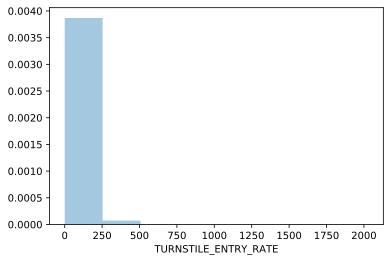

In [56]:
sns.distplot(new_df['TURNSTILE_ENTRY_RATE'], kde=False,bins=8,norm_hist=True);

## To discuss with Aaron for the negative values in Turnstile Entries and Exits

In [110]:
show= data[data["TURNSTILE_ENTRIES"] < 0]
print(show["STATION"].unique())
print(len(show["STATION"].unique()))

['34 ST-HERALD SQ' '8 ST-NYU' 'CORTLANDT ST' 'CANAL ST' '59 ST' 'BAY PKWY'
 '8 AV' '6 AV' 'DEKALB AV' 'JFK JAMAICA CT1' '104 ST' 'METROPOLITAN AV'
 '190 ST' '42 ST-PORT AUTH' '14 ST' 'SPRING ST' '161/YANKEE STAD' '167 ST'
 '182-183 STS' 'LEXINGTON AV/53' 'ELMHURST AV' 'GRAND-NEWTOWN'
 'JAMAICA 179 ST' 'COURT SQ' '23 ST' 'LEXINGTON AV/63' 'JAMAICA CENTER'
 'JOURNAL SQUARE' 'THIRTY ST' 'LACKAWANNA' 'NEWARK BM BW' 'PATH NEW WTC'
 '34 ST-PENN STA' 'TIMES SQ-42 ST' '72 ST' 'WALL ST' '28 ST' '33 ST'
 'GRD CNTRL-42 ST' '86 ST' '125 ST' 'BURNSIDE AV' 'MOSHOLU PKWY'
 '3 AV-149 ST' 'SIMPSON ST' '174 ST' 'WEST FARMS SQ' '52 ST'
 '61 ST WOODSIDE' 'FRANKLIN AV' 'FLATBUSH AV-B.C' 'EASTCHSTER/DYRE']
52


## While Aaron;s code is not working

## Adding Aaron Code(Not working): We should add rate/hour


In [109]:
from datetime import datetime
dt_format = '%m/%d/%Y %H:%M:%S'
working = []
for _, row in enumerate(data.values):
    working.append(datetime.strptime(row[6]+' '+row[7],dt_format))
    data['datetime'] = pd.DataFrame(working)
    data.drop(columns=['DATE','TIME'], inplace=True)

TypeError: can only concatenate str (not "int") to str

## Adding Daily_riders grouped by station/linename

In [98]:
daily_riders= data.groupby(by = ["STATION","LINENAME"])["TURNSTILE_ENTRIES","TURNSTILE_EXITS"].sum().reset_index()
daily_riders.head()

,STATION,LINENAME,TURNSTILE_ENTRIES,TURNSTILE_EXITS
0,1 AV,L,99085.0,110083.0
1,103 ST,1,50063.0,25089.0
2,103 ST,6,75674.0,71633.0
3,103 ST,BC,33225.0,22659.0
4,103 ST-CORONA,7,124750.0,87822.0


## Adding Top_stations by turnstile entries

In [107]:
top_stations= daily_riders.sort_values(by =["TURNSTILE_ENTRIES"],ascending= False)
top_20_stations =top_stations[:20]
top_20_stations

,STATION,LINENAME,TURNSTILE_ENTRIES,TURNSTILE_EXITS
312,GRD CNTRL-42 ST,4567S,875967.0,722962.0
90,34 ST-HERALD SQ,BDFMNQRW,699180.0,715575.0
94,34 ST-PENN STA,ACE,518835.0,463447.0
103,42 ST-PORT AUTH,ACENQRS1237W,424332.0,400549.0
28,14 ST-UNION SQ,LNQR456W,420279.0,363814.0
448,TIMES SQ-42 ST,1237ACENQRSW,380398.0,421604.0
302,FULTON ST,2345ACJZ,366869.0,373643.0
289,FLUSHING-MAIN,7,358499.0,298559.0
107,47-50 STS ROCK,BDFM,353581.0,377741.0
126,59 ST COLUMBUS,ABCD1,349668.0,303423.0


In [49]:
len(data["STATION"].unique())

378

# Renaming Stations name

In [50]:
for station in sorted(data['STATION'].unique()):
    print(station)

1 AV
103 ST
103 ST-CORONA
104 ST
110 ST
111 ST
116 ST
116 ST-COLUMBIA
121 ST
125 ST
135 ST
137 ST CITY COL
138/GRAND CONC
14 ST
14 ST-UNION SQ
145 ST
149/GRAND CONC
14TH STREET
15 ST-PROSPECT
155 ST
157 ST
161/YANKEE STAD
163 ST-AMSTERDM
167 ST
168 ST
169 ST
170 ST
174 ST
174-175 STS
175 ST
176 ST
18 AV
18 ST
181 ST
182-183 STS
183 ST
190 ST
191 ST
2 AV
20 AV
207 ST
21 ST
21 ST-QNSBRIDGE
215 ST
219 ST
225 ST
23 ST
231 ST
233 ST
238 ST
25 AV
25 ST
28 ST
3 AV
3 AV 138 ST
3 AV-149 ST
30 AV
33 ST
33 ST-RAWSON ST
34 ST-HERALD SQ
34 ST-HUDSON YD
34 ST-PENN STA
36 AV
36 ST
39 AV
4 AV-9 ST
40 ST LOWERY ST
42 ST-BRYANT PK
42 ST-PORT AUTH
45 ST
46 ST
46 ST BLISS ST
47-50 STS ROCK
49 ST
4AV-9 ST
5 AV/53 ST
5 AV/59 ST
5 AVE
50 ST
51 ST
52 ST
53 ST
55 ST
57 ST
57 ST-7 AV
59 ST
59 ST COLUMBUS
6 AV
61 ST WOODSIDE
63 DR-REGO PARK
65 ST
66 ST-LINCOLN
67 AV
68ST-HUNTER CO
69 ST
7 AV
71 ST
72 ST
72 ST-2 AVE
74 ST-BROADWAY
75 AV
75 ST-ELDERTS
77 ST
79 ST
8 AV
8 ST-NYU
80 ST
81 ST-MUSEUM
82 ST-JACKSON H
85

**Duplicates are**

- 103 ST, 103 ST-CORONA
- 116 ST,116 ST-COLUMBIA
- 34 ST-PENN STA
- 14 ST, 14 ST-UNION SQ, 14TH STREET
- 182-183 STS, 183 ST
- 21 ST, 21 ST-QNSBRIDGE
- 57 ST, 57 ST-7 AV
- 86 ST, 86 ST-2 AVE
- 96 ST, 96 ST-2 AVE
- BEVERLEY ROAD, BEVERLY RD
- BROADWAY, BROADWAY JCT
- JAMAICA CENTER, JFK JAMAICA CT1
- NEW LOTS, NEW LOTS AV
- PATH NEW WTC, PATH WTC 2
- VAN SICLEN AV, VAN SICLEN AVE

In [ ]:
stations = [""]

# Work in Progress

In [56]:
data["DESC"].value_counts()

REGULAR       205207
RECOVR AUD       756
Name: DESC, dtype: int64

In [57]:
test1= data[data["DESC"]=="RECOVR AUD"]
test1.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
1304,A010,R080,00-00-05,57 ST-7 AV,NQRW,BMT,06/22/2019,08:00:00,RECOVR AUD,1622559,477538
8122,A049,R088,02-00-00,CORTLANDT ST,RNW,BMT,06/24/2019,21:00:00,RECOVR AUD,774097,1063570
8165,A049,R088,02-00-01,CORTLANDT ST,RNW,BMT,06/24/2019,21:00:00,RECOVR AUD,856800,707445
8208,A049,R088,02-00-02,CORTLANDT ST,RNW,BMT,06/24/2019,21:00:00,RECOVR AUD,834334,506470
8251,A049,R088,02-00-03,CORTLANDT ST,RNW,BMT,06/24/2019,21:00:00,RECOVR AUD,872365011,871604578
8294,A049,R088,02-01-00,CORTLANDT ST,RNW,BMT,06/24/2019,21:00:00,RECOVR AUD,877337,1453742
8337,A049,R088,02-01-01,CORTLANDT ST,RNW,BMT,06/24/2019,21:00:00,RECOVR AUD,126025,177980
8380,A049,R088,02-01-02,CORTLANDT ST,RNW,BMT,06/24/2019,21:00:00,RECOVR AUD,1486129,1710643
8423,A049,R088,02-03-00,CORTLANDT ST,RNW,BMT,06/24/2019,21:00:00,RECOVR AUD,1458421,244993
8466,A049,R088,02-03-01,CORTLANDT ST,RNW,BMT,06/24/2019,21:00:00,RECOVR AUD,1020227,252894


In [113]:
data.iloc[8249:8255]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
8249,A049,R088,02-00-03,CORTLANDT ST,RNW,BMT,06/24/2019,13:00:00,REGULAR,872364508,871604473
8250,A049,R088,02-00-03,CORTLANDT ST,RNW,BMT,06/24/2019,17:00:00,REGULAR,872364674,871604521
8251,A049,R088,02-00-03,CORTLANDT ST,RNW,BMT,06/24/2019,21:00:00,RECOVR AUD,872365011,871604578
8252,A049,R088,02-00-03,CORTLANDT ST,RNW,BMT,06/25/2019,01:00:00,REGULAR,872365048,871604585
8253,A049,R088,02-00-03,CORTLANDT ST,RNW,BMT,06/25/2019,05:00:00,REGULAR,872365048,871604585
8254,A049,R088,02-00-03,CORTLANDT ST,RNW,BMT,06/25/2019,09:00:00,REGULAR,872365268,871604721


In [59]:
data["TIME"].unique()

array(['00:00:00', '04:00:00', '08:00:00', ..., '22:48:53', '22:51:38',
       '22:52:59'], dtype=object)

In [60]:
data[data["STATION"]=="59 ST"].tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
163325,R245A,R051,01-06-01,59 ST,456NQRW,IRT,06/27/2019,08:00:00,REGULAR,117477428,485311
163326,R245A,R051,01-06-01,59 ST,456NQRW,IRT,06/27/2019,12:00:00,REGULAR,117477444,485602
163327,R245A,R051,01-06-01,59 ST,456NQRW,IRT,06/27/2019,16:00:00,REGULAR,117477463,486015
163328,R245A,R051,01-06-01,59 ST,456NQRW,IRT,06/27/2019,20:00:00,REGULAR,117477533,486705
163329,R245A,R051,01-06-01,59 ST,456NQRW,IRT,06/28/2019,00:00:00,REGULAR,117477542,486774
163330,R245A,R051,01-06-01,59 ST,456NQRW,IRT,06/28/2019,04:00:00,REGULAR,117477547,486780
163331,R245A,R051,01-06-01,59 ST,456NQRW,IRT,06/28/2019,08:00:00,REGULAR,117477549,486808
163332,R245A,R051,01-06-01,59 ST,456NQRW,IRT,06/28/2019,12:00:00,REGULAR,117477559,487054
163333,R245A,R051,01-06-01,59 ST,456NQRW,IRT,06/28/2019,16:00:00,REGULAR,117477583,487414
163334,R245A,R051,01-06-01,59 ST,456NQRW,IRT,06/28/2019,20:00:00,REGULAR,117477640,487861


In [93]:
test= data[data["STATION"]=="34 ST-PENN STA"]

# Combine with Linemame and change the name of the stations

In [72]:
#data[data["DESC"] == "RECOVR AUD"]
#data.iloc[13:50]
#Only keep the Desc= Reg
#data = data[data["DESC"] != "RECOVR AUD"].reset_index()

In [62]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [63]:
print(data["DIVISION"].value_counts())
print(data["DESC"].value_counts())


IRT    75016
IND    72659
BMT    42989
PTH    13392
SRT     1419
RIT      488
Name: DIVISION, dtype: int64
REGULAR       205207
RECOVR AUD       756
Name: DESC, dtype: int64


In [64]:
# Drop columns that don't add value to the analysis
data = data.drop(labels = ["DIVISION","DESC"], axis = 1)
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,06/22/2019,00:00:00,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,06/22/2019,04:00:00,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,06/22/2019,08:00:00,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,06/22/2019,12:00:00,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,06/22/2019,16:00:00,7108075,2407581


In [65]:
data["TIME"].value_counts()

16:00:00    17395
04:00:00    17391
20:00:00    17389
00:00:00    17385
08:00:00    17374
12:00:00    17370
09:00:00    12794
21:00:00    12793
17:00:00    12791
13:00:00    12783
01:00:00    12778
05:00:00    12760
06:00:00      784
18:00:00      784
02:00:00      784
22:00:00      783
10:00:00      783
14:00:00      781
07:00:00      274
03:00:00      274
19:00:00      274
23:00:00      274
15:00:00      273
11:00:00      273
04:22:00      260
20:22:00      259
00:22:00      259
12:22:00      259
08:22:00      259
16:22:00      259
            ...  
19:19:03        1
14:54:11        1
12:10:04        1
15:37:54        1
04:06:48        1
20:29:57        1
23:44:47        1
18:35:29        1
12:00:03        1
00:12:43        1
02:33:51        1
05:14:17        1
18:43:14        1
16:54:59        1
16:09:58        1
20:50:44        1
23:37:18        1
15:05:10        1
07:15:56        1
22:17:10        1
06:26:32        1
10:06:50        1
14:44:03        1
17:00:54        1
01:05:00  

In [66]:

data["TIME"].unique()

array(['00:00:00', '04:00:00', '08:00:00', ..., '22:48:53', '22:51:38',
       '22:52:59'], dtype=object)

In [67]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,06/22/2019,00:00:00,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,06/22/2019,04:00:00,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,06/22/2019,08:00:00,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,06/22/2019,12:00:00,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,06/22/2019,16:00:00,7108075,2407581


In [68]:
#COnvert time and Date to be able to work with it
f="%m/%d/%Y%H:%M:%S"
data["TIME_STAMP"] = pd.to_datetime(data["DATE"]+data["TIME"],format =f)
data["DATE"] = pd.to_datetime(data["DATE"], format ="%m/%d/%Y")
# Create column with day of the week
data['DAY'] = data['DATE'].dt.day_name()
print(data.dtypes)
data.head()


ValueError: format number 1 of "b'00:00:00'" is not recognized

In [251]:

# Create column with day of the week
data['DAY'] = data['DATE'].dt.day_name()
data.head()



index                 int64
C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DATE         datetime64[ns]
TIME                 object
ENTRIES             float64
EXITS               float64
TIMESTAMP    datetime64[ns]
DAY                  object
dtype: object


In [115]:
data[data["STATION"]=="34 ST-PENN STA"]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
52746,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,06/22/2019,00:00:00,REGULAR,36920,117707
52747,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,06/22/2019,04:00:00,REGULAR,36938,117728
52748,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,06/22/2019,08:00:00,REGULAR,36975,117837
52749,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,06/22/2019,12:00:00,REGULAR,37067,118135
52750,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,06/22/2019,16:00:00,REGULAR,37228,118440
52751,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,06/22/2019,20:00:00,REGULAR,37420,118797
52752,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,06/23/2019,00:00:00,REGULAR,37522,118938
52753,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,06/23/2019,04:00:00,REGULAR,37532,118964
52754,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,06/23/2019,08:00:00,REGULAR,37573,119040
52755,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,06/23/2019,12:00:00,REGULAR,37671,119330
